# Fidelity of quantum states

https://en.wikipedia.org/wiki/Fidelity_of_quantum_states

## Imports

In [2]:
from IPython.display import display

In [3]:
from sympy import init_printing
init_printing(use_latex=True)

In [4]:
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.density import *
from sympy.physics.quantum.spin import (
    Jx, Jy, Jz, Jplus, Jminus, J2,
    JxBra, JyBra, JzBra,
    JxKet, JyKet, JzKet,
)
from IPython.core.display import display_pretty
from sympy.physics.quantum.operator import *

## Basic fidelity using spin kets

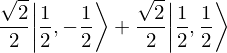

In [5]:
up = JzKet(S(1)/2,S(1)/2)
down = JzKet(S(1)/2,-S(1)/2)
amp = 1/sqrt(2)
updown = (amp * up ) + (amp * down)
updown

Using `represent` turns the kets into matrices:

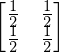

In [7]:
up_dm = represent(up * Dagger(up))
down_dm = represent(down * Dagger(down)) 
updown_dm = represent(updown * Dagger(updown))
updown_dm

Another entangled state:

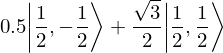

In [8]:
updown2 = (sqrt(3)/2 )* up + (1/2)*down
updown2

In [9]:
fidelity(up_dm, up_dm)

In [10]:
fidelity(up_dm, down_dm)

In [11]:
fidelity(up_dm, updown_dm).evalf()

Alternatively, put kets into density operator and compute fidelity:

In [12]:
d1 = Density( [updown, 0.25], [updown2, 0.75])
d2 = Density( [updown, 0.75], [updown2, 0.25])
fidelity(d1, d2)

## Fidelity with qubit states

In [14]:
from sympy.physics.quantum.qubit import Qubit
state1 = Qubit('0')
state2 = Qubit('1')
state3 = (1/sqrt(2))*state1 + (1/sqrt(2))*state2
state4 = (sqrt(S(2)/3))*state1 + (1/sqrt(3))*state2

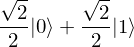

In [15]:
state3

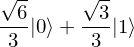

In [16]:
state4

In [ ]:
state1_dm = Density([state1, 1])
state2_dm = Density([state2, 1])
state3_dm = Density([state3, 1])

In [17]:
d1 = Density([state3, 0.70], [state4, 0.30])
d2 = Density([state3, 0.20], [state4, 0.80])
fidelity(d1, d2)